In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_excel("STEM_Satisfaction.xlsx")

In [ ]:
df.head()

,Campus,Field of Study,Gender,Academic Role,Racial/Ethnic identity,Satisfaction Compensation-Salary,Satisfaction Compensation-Start-up Funds,Satisfaction Compensation-Benefits Package,Satisfaction Teaching/ Research/ Service/ Advising-Teaching Load,Satisfaction Teaching/ Research/ Service/ Advising-Class Size,...,Satisfaction Teaching/ Research/ Service/ Advising-Committee/Admin Responsibilities Satisfaction,Satisfaction Teaching/ Research/ Service/ Advising-Clinical Responsibilities Satisfaction,Satisfaction Teaching/ Research/ Service/ Advising-Sense of Value by Students Satisfaction,Satisfaction Teaching/ Research/ Service/ Advising-Sense of Belonging Satisfaction,Satisfaction Teaching/ Research/ Service/ Advising-Research Satisfaction,Satisfaction Teaching/ Research/ Service/ Advising-Marketability Satisfaction,Satisfaction Teaching/ Research/ Service/ Advising-Career Plan Satisfaction,Satisfaction Teaching/ Research/ Service/ Advising-Career Development Support Satisfaction,Satisfaction Teaching/ Research/ Service/ Advising-Award Nominations,Satisfaction Teaching/ Research/ Service/ Advising-Self-Perceived Qualification for Nominations
0,Engineering Campus,STEM,Male,Other (Please Specify),Asian,2.0,5.0,4.0,4.0,2.0,...,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,2.0,2.0
1,Main Campus,STEM,Male,Associate Professor (Tenured),Asian,2.0,3.0,5.0,7.0,2.0,...,2.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0,2.0
2,Health Science Campus,STEM,Female,Associate Professor (Tenured),"White, non-Hispanic",1.0,1.0,2.0,21.0,1.0,...,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Main Campus,STEM,Male,Assistant Professor (Tenured-track),"White, non-Hispanic",2.0,3.0,2.0,22.0,3.0,...,3.0,3.0,4.0,4.0,4.0,2.0,4.0,3.0,1.0,1.0
4,Main Campus,Non-STEM,Female,Administrator,"White, non-Hispanic",1.0,2.0,4.0,7.0,1.0,...,2.0,3.0,2.0,4.0,4.0,2.0,4.0,4.0,1.0,1.0


In [ ]:
new_column_names = [
    'Campus', 'Field_of_Study', 'Gender', 'Academic_Role', 'Racial_Ethnic_Identity',
    'Salary', 'Start_up_Funds', 'Benefits', 'Credits_taught', 'Class_Size',
    'New_Course_Dev', 'Course_Release_Freq', 'Teach_Resp_Satisfaction', 'Access_TA_Satisfaction',
    'Advising_Resp_Satisfaction', 'Scholarly_Work_Time', 'Committee_Resp_Satisfaction',
    'Clinical_Resp_Satisfaction', 'Value_by_Students', 'Belonging_Satisfaction', 'Research_Satisfaction',
    'Marketability_Satisfaction', 'Career_Plan_Satisfaction', 'Career_Dev_Support', 'Award_Nominations',
    'Self_Perceived_Qualification'
]
df.columns = new_column_names

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,213.0,2.394366,1.290154,1.0,1.0,2.0,4.0,5.0
Start_up_Funds,148.0,2.493243,1.248109,1.0,1.0,2.0,3.0,5.0
Benefits,207.0,3.531401,1.181463,1.0,3.0,4.0,4.0,5.0
Credits_taught,198.0,15.707071,9.474253,1.0,7.0,15.0,23.0,41.0
Class_Size,190.0,2.531579,1.374966,1.0,2.0,2.0,3.0,5.0
New_Course_Dev,192.0,2.208333,1.183806,1.0,1.0,2.0,3.0,7.0
Course_Release_Freq,206.0,0.985437,0.527101,0.0,1.0,1.0,1.0,2.0
Teach_Resp_Satisfaction,204.0,3.352941,1.188177,1.0,2.0,4.0,4.0,5.0
Access_TA_Satisfaction,190.0,2.389474,1.270710,1.0,1.0,2.0,3.0,5.0
Advising_Resp_Satisfaction,190.0,3.152632,0.998872,1.0,3.0,3.0,4.0,5.0


In [ ]:
df.isnull().sum()

,0
Campus,0
Field_of_Study,2
Gender,2
Academic_Role,2
Racial_Ethnic_Identity,5
Salary,6
Start_up_Funds,71
Benefits,12
Credits_taught,21
Class_Size,29


In [ ]:
df = df.drop(columns=['Campus', 'Racial_Ethnic_Identity', 'Academic_Role', 'Salary', 'Benefits'])

In [ ]:
STEM_df = df[df['Field_of_Study'].isin(['STEM', 'STEM Clinical'])]

In [ ]:
STEM_df

,Field_of_Study,Gender,Start_up_Funds,Credits_taught,Class_Size,New_Course_Dev,Course_Release_Freq,Teach_Resp_Satisfaction,Access_TA_Satisfaction,Advising_Resp_Satisfaction,...,Committee_Resp_Satisfaction,Clinical_Resp_Satisfaction,Value_by_Students,Belonging_Satisfaction,Research_Satisfaction,Marketability_Satisfaction,Career_Plan_Satisfaction,Career_Dev_Support,Award_Nominations,Self_Perceived_Qualification
0,STEM,Male,5.0,4.0,2.0,1.0,1.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,2.0,2.0
1,STEM,Male,3.0,7.0,2.0,1.0,2.0,3.0,1.0,3.0,...,2.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0,2.0
2,STEM,Female,1.0,21.0,1.0,3.0,1.0,1.0,1.0,3.0,...,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,STEM,Male,3.0,22.0,3.0,3.0,1.0,4.0,1.0,3.0,...,3.0,3.0,4.0,4.0,4.0,2.0,4.0,3.0,1.0,1.0
6,STEM Clinical,Male,1.0,10.0,1.0,4.0,1.0,4.0,2.0,3.0,...,4.0,3.0,5.0,4.0,2.0,4.0,4.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,STEM,Male,1.0,15.0,3.0,NaN,2.0,1.0,3.0,3.0,...,3.0,NaN,2.0,2.0,3.0,3.0,3.0,2.0,1.0,1.0
213,STEM,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,STEM,Male,1.0,19.0,2.0,2.0,1.0,5.0,1.0,5.0,...,4.0,NaN,2.0,1.0,5.0,1.0,4.0,1.0,1.0,1.0
217,STEM,Male,4.0,18.0,2.0,5.0,1.0,1.0,1.0,2.0,...,1.0,NaN,2.0,1.0,2.0,4.0,3.0,2.0,2.0,1.0


In [ ]:
STEM_df.isnull().sum()

,0
Field_of_Study,0
Gender,0
Start_up_Funds,43
Credits_taught,13
Class_Size,20
New_Course_Dev,17
Course_Release_Freq,6
Teach_Resp_Satisfaction,7
Access_TA_Satisfaction,17
Advising_Resp_Satisfaction,15


In [ ]:
STEM_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 0 to 218
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Field_of_Study                137 non-null    object 
 1   Gender                        137 non-null    object 
 2   Start_up_Funds                94 non-null     float64
 3   Credits_taught                124 non-null    float64
 4   Class_Size                    117 non-null    float64
 5   New_Course_Dev                120 non-null    float64
 6   Course_Release_Freq           131 non-null    float64
 7   Teach_Resp_Satisfaction       130 non-null    float64
 8   Access_TA_Satisfaction        120 non-null    float64
 9   Advising_Resp_Satisfaction    122 non-null    float64
 10  Scholarly_Work_Time           125 non-null    float64
 11  Committee_Resp_Satisfaction   130 non-null    float64
 12  Clinical_Resp_Satisfaction    78 non-null     float64
 13  Value_by_S

In [ ]:
# Impute missing values for numerical columns with mean
imputer_mean = SimpleImputer(strategy='mean')
numerical_columns = STEM_df.select_dtypes(include=[np.number]).columns
STEM_df.loc[:, numerical_columns] = imputer_mean.fit_transform(STEM_df[numerical_columns])

In [ ]:
STEM_df.isnull().sum()

,0
Field_of_Study,0
Gender,0
Start_up_Funds,0
Credits_taught,0
Class_Size,0
New_Course_Dev,0
Course_Release_Freq,0
Teach_Resp_Satisfaction,0
Access_TA_Satisfaction,0
Advising_Resp_Satisfaction,0


In [ ]:
# Standardize the numerical data (Likert scale columns) using MinMaxScaler
scaler = MinMaxScaler()
STEM_df.loc[:, STEM_df.columns.difference(['Field_of_Study', 'Gender'])] = scaler.fit_transform(
    STEM_df.loc[:, STEM_df.columns.difference(['Field_of_Study', 'Gender'])]
)

In [ ]:
STEM_df.head()

,Field_of_Study,Gender,Start_up_Funds,Credits_taught,Class_Size,New_Course_Dev,Course_Release_Freq,Teach_Resp_Satisfaction,Access_TA_Satisfaction,Advising_Resp_Satisfaction,...,Committee_Resp_Satisfaction,Clinical_Resp_Satisfaction,Value_by_Students,Belonging_Satisfaction,Research_Satisfaction,Marketability_Satisfaction,Career_Plan_Satisfaction,Career_Dev_Support,Award_Nominations,Self_Perceived_Qualification
0,STEM,Male,1.0,0.075,0.25,0.000000,0.5,1.00,1.00,1.0,...,1.00,1.0,1.00,1.00,1.00,0.75,0.75,0.75,1.0,1.0
1,STEM,Male,0.5,0.150,0.25,0.000000,1.0,0.50,0.00,0.5,...,0.25,0.0,1.00,0.50,0.00,0.00,0.25,0.50,0.0,1.0
2,STEM,Female,0.0,0.500,0.00,0.333333,0.5,0.00,0.00,0.5,...,0.00,0.5,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
3,STEM,Male,0.5,0.525,0.50,0.333333,0.5,0.75,0.00,0.5,...,0.50,0.5,0.75,0.75,0.75,0.25,0.75,0.50,0.0,0.0
6,STEM Clinical,Male,0.0,0.225,0.00,0.500000,0.5,0.75,0.25,0.5,...,0.75,0.5,1.00,0.75,0.25,0.75,0.75,0.00,0.0,0.0


In [ ]:
STEM_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Start_up_Funds,137.0,0.420213,0.266397,0.0,0.250,0.420213,0.500000,1.0
Credits_taught,137.0,0.372581,0.238165,0.0,0.175,0.372581,0.525000,1.0
Class_Size,137.0,0.435897,0.336441,0.0,0.250,0.435897,0.500000,1.0
New_Course_Dev,137.0,0.170833,0.159736,0.0,0.000,0.166667,0.170833,1.0
Course_Release_Freq,137.0,0.503817,0.274506,0.0,0.500,0.500000,0.500000,1.0
Teach_Resp_Satisfaction,137.0,0.632692,0.273170,0.0,0.500,0.750000,0.750000,1.0
Access_TA_Satisfaction,137.0,0.416667,0.300633,0.0,0.250,0.416667,0.750000,1.0
Advising_Resp_Satisfaction,137.0,0.565574,0.218205,0.0,0.500,0.500000,0.750000,1.0
Scholarly_Work_Time,137.0,0.354000,0.295779,0.0,0.000,0.250000,0.500000,1.0
Committee_Resp_Satisfaction,137.0,0.498077,0.252735,0.0,0.250,0.500000,0.750000,1.0


In [ ]:
categories = {
    'Teaching and Advising': ['Credits_taught', 'Class_Size', 'New_Course_Dev', 'Course_Release_Freq', 'Teach_Resp_Satisfaction', 'Access_TA_Satisfaction', 'Advising_Resp_Satisfaction', 'Value_by_Students'],
    'Scholarship': ['Start_up_Funds', 'Scholarly_Work_Time', 'Belonging_Satisfaction', 'Research_Satisfaction'],
    'Professional and Administrative Services': ['Committee_Resp_Satisfaction', 'Clinical_Resp_Satisfaction'   ],
    'Career and Professional Development': ['Marketability_Satisfaction', 'Career_Plan_Satisfaction', 'Career_Dev_Support'],
    'Awards and Recognition': ['Award_Nominations', 'Self_Perceived_Qualification']
}

In [ ]:
weights = {
    'Teaching and Advising': [1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8],
    'Scholarship': [1/4, 1/4, 1/4, 1/4],
    'Professional and Administrative Services': [1/2, 1/2],
    'Career and Professional Development': [1/3, 1/3, 1/3],
    'Awards and Recognition': [1/2, 1/2],
}

In [ ]:
for category, columns in categories.items():
    weight = weights[category]
    for col, w in zip(columns, weight):
        STEM_df[f'{col}_Weighted'] = STEM_df[col] * w
    STEM_df[category] = STEM_df[[f'{col}_Weighted' for col in columns]].sum(axis=1)
    STEM_df[f'{category}_Percentage'] = STEM_df[category] * 100

<ipython-input-19-a15956c29de4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  STEM_df[f'{col}_Weighted'] = STEM_df[col] * w
<ipython-input-19-a15956c29de4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  STEM_df[f'{col}_Weighted'] = STEM_df[col] * w
<ipython-input-19-a15956c29de4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
gender_df = STEM_df[['Gender'] + [category for category in categories] ]

In [ ]:
# Filter gender to include only male and female
gender_df = gender_df[gender_df['Gender'].isin(['Male', 'Female'])]

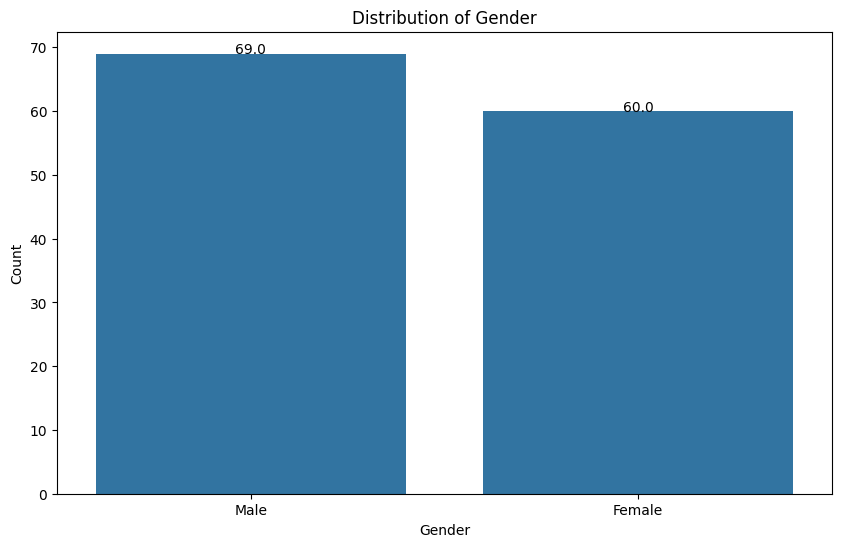

In [ ]:
# Plot distribution for Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=gender_df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.show()

In [ ]:
# Encode Gender, Race, and Rank and save the mappings
label_encoders = {}
encoding_mappings = {}

# for column in ['Gender', 'Racial_Ethnic_Identity', 'Academic_Role']:
#     le = LabelEncoder()
#     new_df[column] = le.fit_transform(new_df[column])
#     label_encoders[column] = le
#     # Save the mapping
#     encoding_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

for column in ['Gender']:
    le = LabelEncoder()
    gender_df[column] = le.fit_transform(gender_df[column])
    label_encoders[column] = le
    # Save the mapping
    encoding_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

In [ ]:
for column, mapping in encoding_mappings.items():
    print(f"Encoding mapping for {column}: {mapping}")

Encoding mapping for Gender: {'Female': 0, 'Male': 1}


In [ ]:
gender_df.head()

,Gender,Teaching and Advising,Scholarship,Professional and Administrative Services,Career and Professional Development,Awards and Recognition
0,1,0.603125,1.0000,1.000,0.75,1.0
1,1,0.425000,0.2500,0.125,0.25,0.5
2,0,0.229167,0.0000,0.250,0.00,0.0
3,1,0.482292,0.5625,0.500,0.50,0.0
6,1,0.465625,0.3125,0.625,0.50,0.0


In [ ]:
# Define weights for overall satisfaction calculation
overall_weights = {
    'Teaching and Advising': 1/5,
    'Scholarship': 1/5,
    'Professional and Administrative Services': 1/5,
    'Career and Professional Development': 1/5,
    'Awards and Recognition': 1/5,
}

In [ ]:
# Calculate Overall Satisfaction
gender_df['Overall_Satisfaction'] = (
    gender_df['Teaching and Advising'] * overall_weights['Teaching and Advising'] +
    gender_df['Scholarship'] * overall_weights['Scholarship'] +
    gender_df['Professional and Administrative Services'] * overall_weights['Professional and Administrative Services'] +
    gender_df['Career and Professional Development'] * overall_weights['Career and Professional Development'] +
    gender_df['Awards and Recognition'] * overall_weights['Awards and Recognition']
)

In [ ]:
gender_df.head()

,Gender,Teaching and Advising,Scholarship,Professional and Administrative Services,Career and Professional Development,Awards and Recognition,Overall_Satisfaction
0,1,0.603125,1.0000,1.000,0.75,1.0,0.870625
1,1,0.425000,0.2500,0.125,0.25,0.5,0.310000
2,0,0.229167,0.0000,0.250,0.00,0.0,0.095833
3,1,0.482292,0.5625,0.500,0.50,0.0,0.408958
6,1,0.465625,0.3125,0.625,0.50,0.0,0.380625


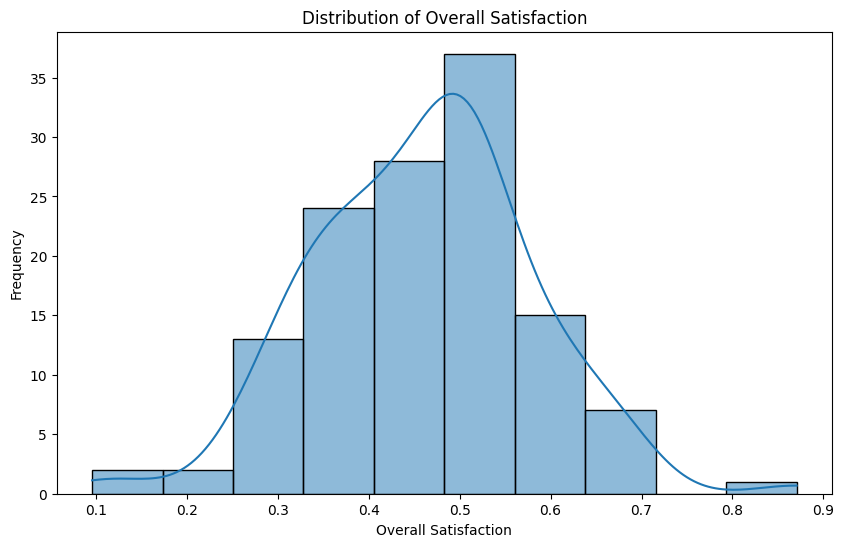

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(gender_df['Overall_Satisfaction'], kde=True, bins=10)
plt.title('Distribution of Overall Satisfaction')
plt.xlabel('Overall Satisfaction')
plt.ylabel('Frequency')
plt.show()

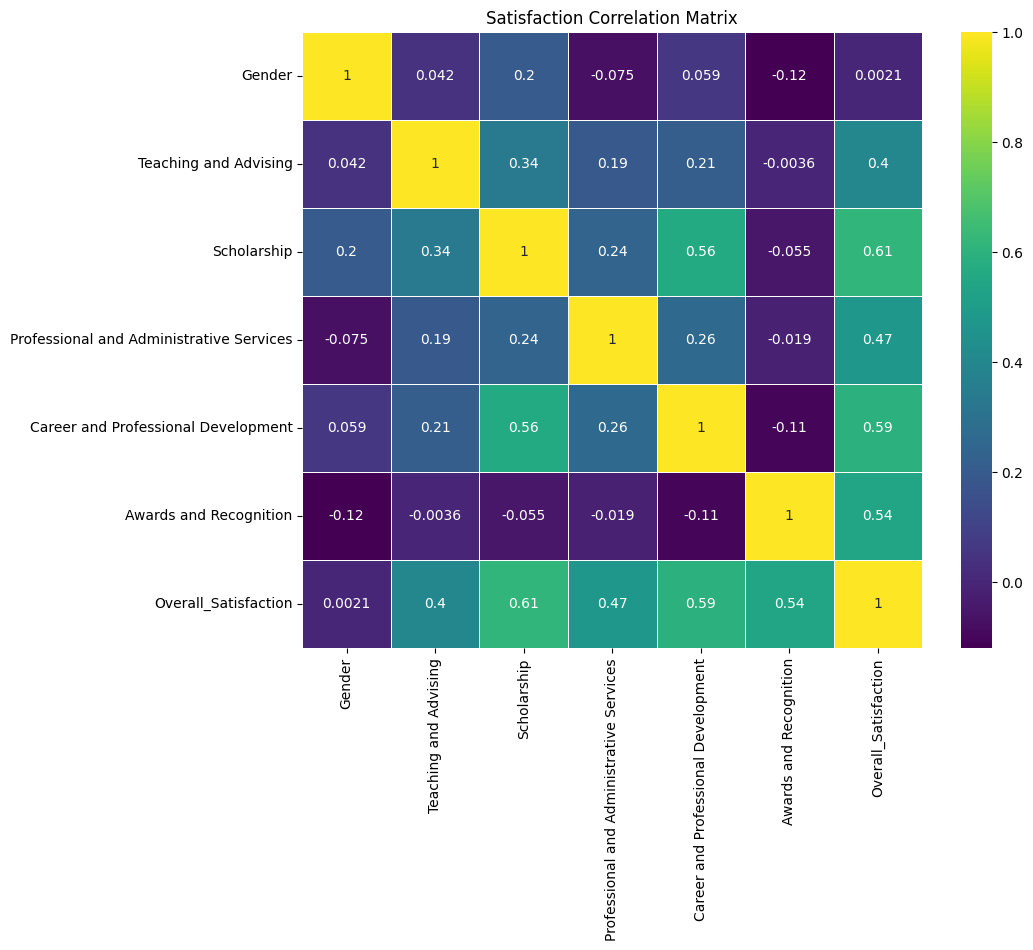

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = gender_df.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Satisfaction Correlation Matrix')
plt.show()

#Perform 2-Sample t-test on the data based on gender(Male, Female)

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
features = ['Teaching and Advising', 'Scholarship', 'Professional and Administrative Services',
            'Career and Professional Development', 'Awards and Recognition',  'Overall_Satisfaction']

In [ ]:
# Separate the data by gender
female_data = gender_df[gender_df['Gender'] == 0]
male_data = gender_df[gender_df['Gender'] == 1]

In [ ]:
# Perform two-sample t-test for each feature
t_test_results = {}
for feature in features:
    t_stat, p_value = ttest_ind(male_data[feature], female_data[feature], nan_policy='omit')
    male_mean = male_data[feature].mean()
    female_mean = female_data[feature].mean()
    t_test_results[feature] = {'t_stat': t_stat, 'p_value': p_value, 'male_mean': male_mean, 'female_mean': female_mean}

In [ ]:
# Convert the results to a DataFrame for easy viewing
t_test_df = pd.DataFrame(t_test_results).T
print(t_test_df)

                                            t_stat   p_value  male_mean  \
Teaching and Advising                     0.585189  0.559459   0.478727   
Scholarship                               2.618823  0.009897   0.491814   
Professional and Administrative Services -0.672000  0.502805   0.508055   
Career and Professional Development       0.934694  0.351720   0.523073   
Awards and Recognition                   -1.354476  0.177990   0.317324   
Overall_Satisfaction                      0.308885  0.757915   0.463799   

                                          female_mean  
Teaching and Advising                        0.467121  
Scholarship                                  0.407783  
Professional and Administrative Services     0.529103  
Career and Professional Development          0.485759  
Awards and Recognition                       0.396572  
Overall_Satisfaction                         0.457268  


In [ ]:
# Interpretation
significant_features = t_test_df[t_test_df['p_value'] < 0.05]
print("\nSignificant Features (p < 0.05):")
print(significant_features)


Significant Features (p < 0.05):
               t_stat   p_value  male_mean  female_mean
Scholarship  2.618823  0.009897   0.491814     0.407783


#Classify Satisfaction (High - 1, Low - 0)

In [ ]:
threshold = 0.5
male_data['Satisfaction_Label'] = np.where(male_data['Overall_Satisfaction'] >= threshold, 1, 0)

<ipython-input-37-99ee52e005f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data['Satisfaction_Label'] = np.where(male_data['Overall_Satisfaction'] >= threshold, 1, 0)


In [ ]:
male_data

,Gender,Teaching and Advising,Scholarship,Professional and Administrative Services,Career and Professional Development,Awards and Recognition,Overall_Satisfaction,Satisfaction_Label
0,1,0.603125,1.000000,1.000000,0.750000,1.0,0.870625,1
1,1,0.425000,0.250000,0.125000,0.250000,0.5,0.310000,0
3,1,0.482292,0.562500,0.500000,0.500000,0.0,0.408958,0
6,1,0.465625,0.312500,0.625000,0.500000,0.0,0.380625,0
12,1,0.462363,0.500000,0.500000,0.666667,0.5,0.525806,1
...,...,...,...,...,...,...,...,...
207,1,0.572917,0.542553,0.500000,0.500000,0.5,0.523094,1
210,1,0.604167,0.542553,0.500000,0.333333,1.0,0.596011,1
212,1,0.408854,0.250000,0.519231,0.416667,0.0,0.318950,0
215,1,0.452083,0.500000,0.644231,0.250000,0.0,0.369263,0


In [ ]:
threshold = 0.5
female_data['Satisfaction_Label'] = np.where(female_data['Overall_Satisfaction'] >= threshold, 1, 0)

<ipython-input-39-fc0ab161dab4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_data['Satisfaction_Label'] = np.where(female_data['Overall_Satisfaction'] >= threshold, 1, 0)


In [ ]:
female_data

,Gender,Teaching and Advising,Scholarship,Professional and Administrative Services,Career and Professional Development,Awards and Recognition,Overall_Satisfaction,Satisfaction_Label
2,0,0.229167,0.000000,0.250000,0.000000,0.000000,0.095833,0
7,0,0.541667,0.312500,0.250000,0.416667,0.500000,0.404167,0
8,0,0.445833,0.375000,0.875000,0.166667,0.500000,0.472500,0
10,0,0.502988,0.355053,0.750000,0.500000,0.500000,0.521608,1
13,0,0.427083,0.105053,0.625000,0.333333,0.000000,0.298094,0
14,0,0.377083,0.687500,0.519231,0.583333,0.000000,0.433429,0
17,0,0.442708,0.312500,0.125000,0.333333,0.500000,0.342708,0
19,0,0.470833,0.355053,0.750000,0.416667,0.500000,0.498511,0
24,0,0.420833,0.250000,0.375000,0.250000,0.197674,0.298702,0
35,0,0.333517,0.355053,0.644231,0.676075,1.000000,0.601775,1


#Implementing Random Forest

Group A - Male

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# Define features and target
X = male_data.drop(columns=['Overall_Satisfaction', 'Satisfaction_Label', 'Gender'])
y = male_data['Satisfaction_Label']

# Split the data into training and testing sets
X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a random forest classifier
rf_male_model = RandomForestClassifier(random_state=42)
rf_male_model.fit(X_male_train, y_male_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set using random forest
y_pred_male__rf = rf_male_model.predict(X_male_test)

# Generate the classification report
classification_rep = classification_report(y_male_test, y_pred_male__rf, target_names=['Low Satisfaction', 'High Satisfaction'])
print("Classification Report:\n", classification_rep)

Classification Report:
                    precision    recall  f1-score   support

 Low Satisfaction       0.71      0.71      0.71         7
High Satisfaction       0.71      0.71      0.71         7

         accuracy                           0.71        14
        macro avg       0.71      0.71      0.71        14
     weighted avg       0.71      0.71      0.71        14



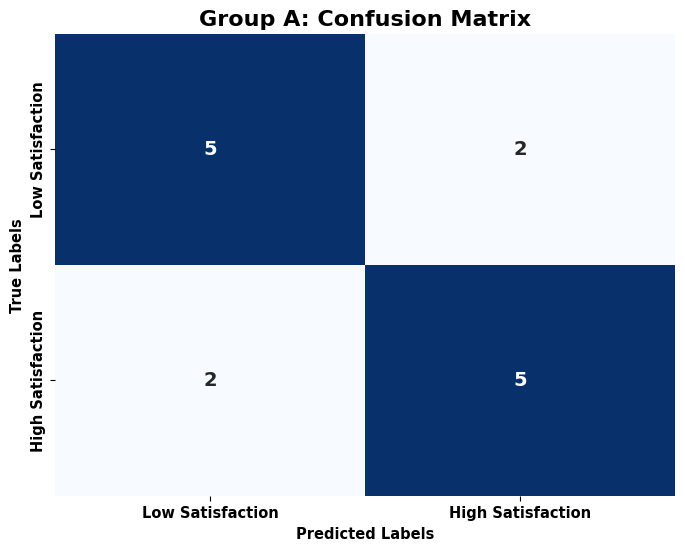

In [ ]:
cm_male = confusion_matrix(y_male_test, y_pred_male__rf)
labels = ['Low Satisfaction', 'High Satisfaction']
plt.figure(figsize=(8, 6))
sns.heatmap(cm_male, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels,
            annot_kws={"size": 14, "weight": "bold"})

# Customizing the title and labels
plt.title('Group A: Confusion Matrix', fontsize=16, fontweight='bold', fontname='Arial')
plt.xlabel('Predicted Labels', fontsize=10.5, fontweight='bold', fontname='Arial')
plt.ylabel('True Labels', fontsize=10.5, fontweight='bold', fontname='Arial')

# Setting the font for x and y tick labels
plt.xticks(fontsize=10.5, fontweight='bold', fontname='Arial')
plt.yticks(fontsize=10.5, fontweight='bold', fontname='Arial')

# Show the plot
plt.show()

Group B - Female

In [ ]:
# Define features and target
X = female_data.drop(columns=['Overall_Satisfaction', 'Satisfaction_Label', 'Gender'])
y = female_data['Satisfaction_Label']

# Split the data into training and testing sets
X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a random forest classifier
rf_female_model = RandomForestClassifier(random_state=42)
rf_female_model.fit(X_female_train, y_female_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set using random forest
y_pred_female__rf = rf_female_model.predict(X_female_test)

# Generate the classification report
classification_rep = classification_report(y_female_test, y_pred_female__rf, target_names=['Low Satisfaction', 'High Satisfaction'])
print("Classification Report:\n", classification_rep)

Classification Report:
                    precision    recall  f1-score   support

 Low Satisfaction       0.89      1.00      0.94         8
High Satisfaction       1.00      0.75      0.86         4

         accuracy                           0.92        12
        macro avg       0.94      0.88      0.90        12
     weighted avg       0.93      0.92      0.91        12



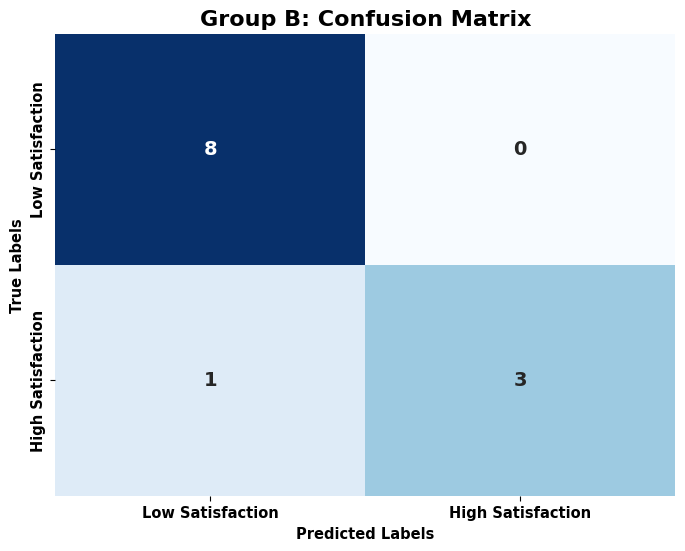

In [ ]:
cm_female = confusion_matrix(y_female_test, y_pred_female__rf)
labels = ['Low Satisfaction', 'High Satisfaction']
plt.figure(figsize=(8, 6))
sns.heatmap(cm_female, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels,
            annot_kws={"size": 14, "weight": "bold"})

# Customizing the title and labels
plt.title('Group B: Confusion Matrix', fontsize=16, fontweight='bold', fontname='Arial')
plt.xlabel('Predicted Labels', fontsize=10.5, fontweight='bold', fontname='Arial')
plt.ylabel('True Labels', fontsize=10.5, fontweight='bold', fontname='Arial')

# Setting the font for x and y tick labels
plt.xticks(fontsize=10.5, fontweight='bold', fontname='Arial')
plt.yticks(fontsize=10.5, fontweight='bold', fontname='Arial')

# Show the plot
plt.show()

#Using RandomOversampler

In [ ]:
# Count the occurrences of each class in the Satisfaction_Label column
satisfaction_male_counts = male_data['Satisfaction_Label'].value_counts()
print(satisfaction_male_counts)

Satisfaction_Label
0    43
1    26
Name: count, dtype: int64


In [ ]:
# Count the occurrences of each class in the Satisfaction_Label column
satisfaction_female_counts = female_data['Satisfaction_Label'].value_counts()
print(satisfaction_female_counts)

Satisfaction_Label
0    38
1    22
Name: count, dtype: int64


In [ ]:
def split_dataset(dataframe):
    train, valid, test = np.split(dataframe.sample(frac=1, random_state=42),
                                  [int(0.6*len(dataframe)), int(0.8*len(dataframe))])
    return train, valid, test

In [ ]:
from imblearn.over_sampling import RandomOverSampler

def oversample_dataset(dataframe, oversample=False):
    columns_to_drop = ['Overall_Satisfaction', 'Satisfaction_Label', 'Gender']
    X = dataframe.drop(columns_to_drop, axis=1)
    y = dataframe['Satisfaction_Label']

    if oversample:
        oversampler = RandomOverSampler(random_state=42)
        X, y = oversampler.fit_resample(X, y)

    oversampled_df = pd.DataFrame(X, columns=X.columns)
    oversampled_df['Satisfaction_Label'] = y

    return oversampled_df, X.values, y.values

In [ ]:
# Oversample and split the male and female datasets
train_male, valid_male, test_male = split_dataset(male_data)
train_female, valid_female, test_female = split_dataset(female_data)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
print("Training Male Class Distribution:")
print(train_male['Satisfaction_Label'].value_counts())

print("Training Female Class Distribution:")
print(train_female['Satisfaction_Label'].value_counts())

Training Male Class Distribution:
Satisfaction_Label
0    26
1    15
Name: count, dtype: int64
Training Female Class Distribution:
Satisfaction_Label
0    24
1    12
Name: count, dtype: int64


In [ ]:
# Apply oversampling to the training sets
data_train_male, X_train_male, y_train_male = oversample_dataset(train_male, oversample=True)
data_train_female, X_train_female, y_train_female = oversample_dataset(train_female, oversample=True)

# No oversampling for validation and test sets
data_valid_male, X_valid_male, y_valid_male = oversample_dataset(valid_male, oversample=False)
data_valid_female, X_valid_female, y_valid_female = oversample_dataset(valid_female, oversample=False)
data_test_male, X_test_male, y_test_male = oversample_dataset(test_male, oversample=False)
data_test_female, X_test_female, y_test_female = oversample_dataset(test_female, oversample=False)


Group A - Male

In [ ]:
# Train the RandomForestClassifier on the oversampled male dataset
forest_male = RandomForestClassifier(n_estimators=100, random_state=42)
forest_male.fit(X_train_male, y_train_male)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set using random forest
y_pred_forest_male = forest_male.predict(X_test_male)

# Generate the classification report
classification_rep = classification_report(y_test_male, y_pred_forest_male, target_names=['Low Satisfaction', 'High Satisfaction'])
print("Classification Report:\n", classification_rep)

Classification Report:
                    precision    recall  f1-score   support

 Low Satisfaction       0.71      1.00      0.83         5
High Satisfaction       1.00      0.78      0.88         9

         accuracy                           0.86        14
        macro avg       0.86      0.89      0.85        14
     weighted avg       0.90      0.86      0.86        14



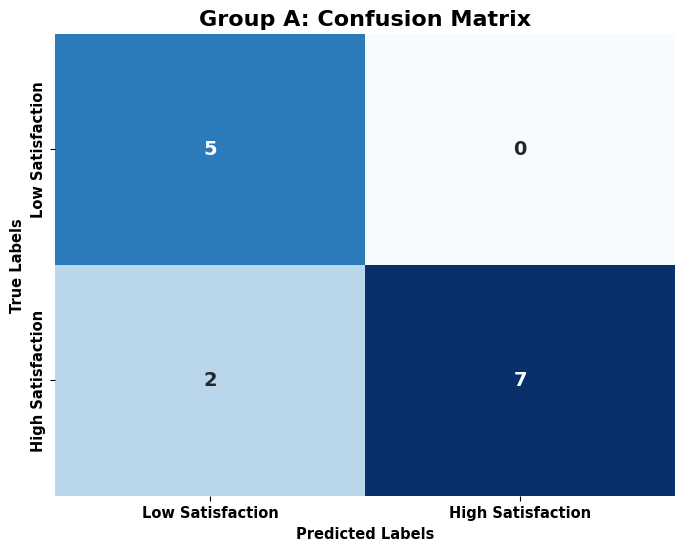

In [ ]:
cm_male = confusion_matrix(y_test_male, y_pred_forest_male)
labels = ['Low Satisfaction', 'High Satisfaction']
plt.figure(figsize=(8, 6))
sns.heatmap(cm_male, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels,
            annot_kws={"size": 14, "weight": "bold"})

# Customizing the title and labels
plt.title('Group A: Confusion Matrix', fontsize=16, fontweight='bold', fontname='Arial')
plt.xlabel('Predicted Labels', fontsize=10.5, fontweight='bold', fontname='Arial')
plt.ylabel('True Labels', fontsize=10.5, fontweight='bold', fontname='Arial')

# Setting the font for x and y tick labels
plt.xticks(fontsize=10.5, fontweight='bold', fontname='Arial')
plt.yticks(fontsize=10.5, fontweight='bold', fontname='Arial')

# Show the plot
plt.show()

<ipython-input-60-fe70eb49faff>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette=palette)


Feature Importances:
 Scholarship                                 0.331396
Career and Professional Development         0.227194
Awards and Recognition                      0.183936
Teaching and Advising                       0.141580
Professional and Administrative Services    0.115894
dtype: float64


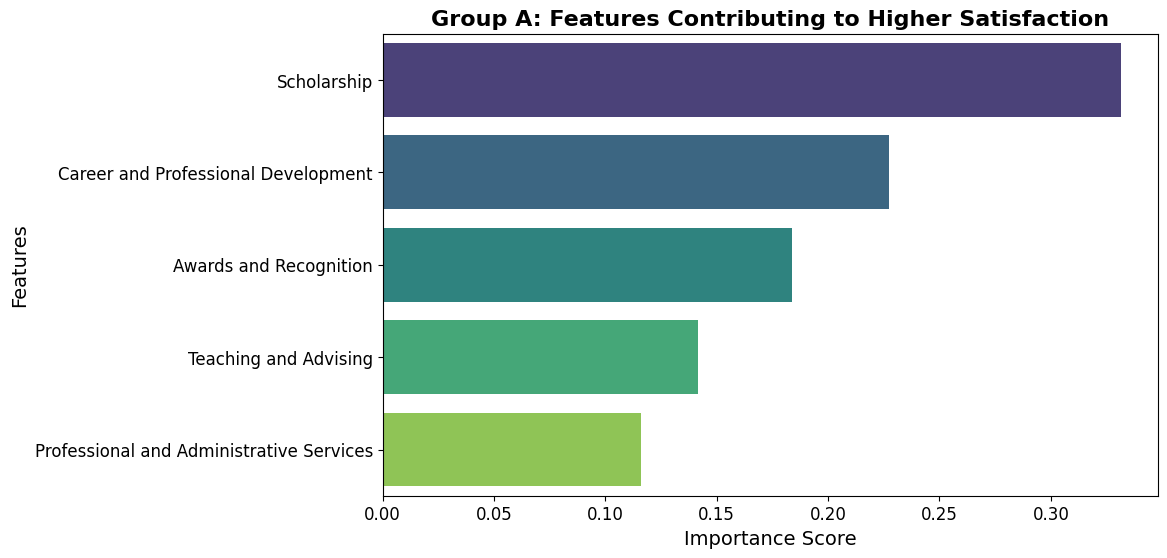

In [ ]:
feature_importances = pd.Series(forest_male.feature_importances_, index=X.columns)

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)
palette = sns.color_palette("viridis", len(feature_importances))
# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette=palette)
plt.title('Group A: Features Contributing to Higher Satisfaction', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Group B - Female

In [ ]:
# Train the RandomForestClassifier on the oversampled male dataset
forest_female = RandomForestClassifier(random_state=42)
forest_female.fit(X_train_female, y_train_female)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set using random forest
y_pred_forest_female = forest_female.predict(X_test_female)

# Generate the classification report
classification_rep = classification_report(y_test_female, y_pred_forest_female, target_names=['Low Satisfaction', 'High Satisfaction'])
print("Classification Report:\n", classification_rep)

Classification Report:
                    precision    recall  f1-score   support

 Low Satisfaction       1.00      0.88      0.93         8
High Satisfaction       0.80      1.00      0.89         4

         accuracy                           0.92        12
        macro avg       0.90      0.94      0.91        12
     weighted avg       0.93      0.92      0.92        12



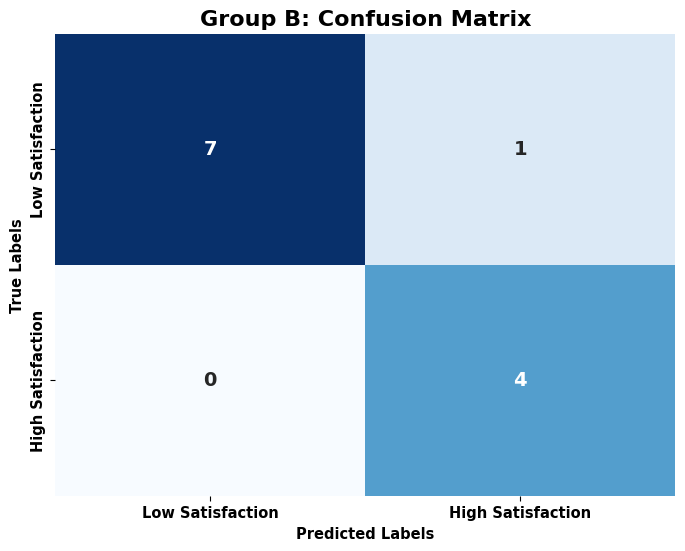

In [ ]:
cm_female = confusion_matrix(y_test_female, y_pred_forest_female)

labels = ['Low Satisfaction', 'High Satisfaction']
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_female, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels,
            annot_kws={"size": 14, "weight": "bold"})

# Customizing the title and labels
plt.title('Group B: Confusion Matrix', fontsize=16, fontweight='bold', fontname='Arial')
plt.xlabel('Predicted Labels', fontsize=10.5, fontweight='bold', fontname='Arial')
plt.ylabel('True Labels', fontsize=10.5, fontweight='bold', fontname='Arial')

# Setting the font for x and y tick labels
plt.xticks(fontsize=10.5, fontweight='bold', fontname='Arial')
plt.yticks(fontsize=10.5, fontweight='bold', fontname='Arial')

# Show the plot
plt.show()

Feature Importances:
 Professional and Administrative Services    0.327105
Awards and Recognition                      0.255031
Scholarship                                 0.158804
Teaching and Advising                       0.144229
Career and Professional Development         0.114831
dtype: float64


<ipython-input-64-e640a1f8d802>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette=palette)


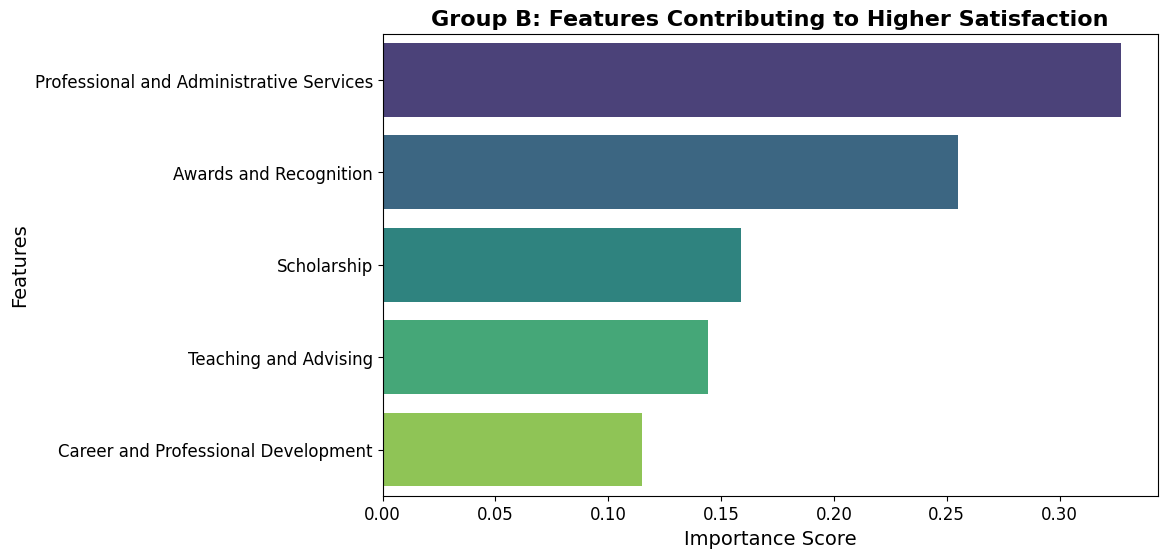

In [ ]:
feature_importances = pd.Series(forest_female.feature_importances_, index=X.columns)

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)
palette = sns.color_palette("viridis", len(feature_importances))
# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette=palette)
plt.title('Group B: Features Contributing to Higher Satisfaction', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Implementing SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

def oversample_dataset_SMOTE(dataframe, oversample=False):
    columns_to_drop = ['Overall_Satisfaction', 'Satisfaction_Label', 'Gender']
    X = dataframe.drop(columns_to_drop, axis=1).values
    y = dataframe['Satisfaction_Label'].values

    if oversample:
        smote = SMOTE(random_state=42)
        X, y = smote.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [ ]:
# Split the male dataset
train_smote_male, valid_smote_male, test_smote_male = split_dataset(male_data)

# Split the female dataset
train_smote_female, valid_smote_female, test_smote_female = split_dataset(female_data)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
# Apply SMOTE to the training set for males
data_train_smote_male, X_train_smote_male, y_train_smote_male = oversample_dataset_SMOTE(train_smote_male, oversample=True)

# No oversampling for validation and test sets for males
data_valid_smote_male, X_valid_smote_male, y_valid_smote_male = oversample_dataset_SMOTE(valid_smote_male, oversample=False)
data_test_smote_male, X_test_smote_male, y_test_smote_male = oversample_dataset_SMOTE(test_smote_male, oversample=False)

# Apply SMOTE to the training set for females
data_train_smote_female, X_train_smote_female, y_train_smote_female = oversample_dataset_SMOTE(train_smote_female, oversample=True)

# No oversampling for validation and test sets for females
data_valid_smote_female, X_valid_smote_female, y_valid_smote_female = oversample_dataset_SMOTE(valid_smote_female, oversample=False)
data_test_smote_female, X_test_smote_female, y_test_smote_female = oversample_dataset_SMOTE(test_smote_female, oversample=False)

In [ ]:
# Train the RandomForestClassifier on the oversampled male training dataset
rf_male = RandomForestClassifier(n_estimators=100, random_state=42)
rf_male.fit(X_train_smote_male, y_train_smote_male)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set using random forest
y_pred_male = rf_male.predict(X_test_smote_male)

# Generate the classification report
classification_rep = classification_report(y_test_smote_male, y_pred_male, target_names=['Low Satisfaction', 'High Satisfaction'])
print("Classification Report:\n", classification_rep)

Classification Report:
                    precision    recall  f1-score   support

 Low Satisfaction       0.62      1.00      0.77         5
High Satisfaction       1.00      0.67      0.80         9

         accuracy                           0.79        14
        macro avg       0.81      0.83      0.78        14
     weighted avg       0.87      0.79      0.79        14



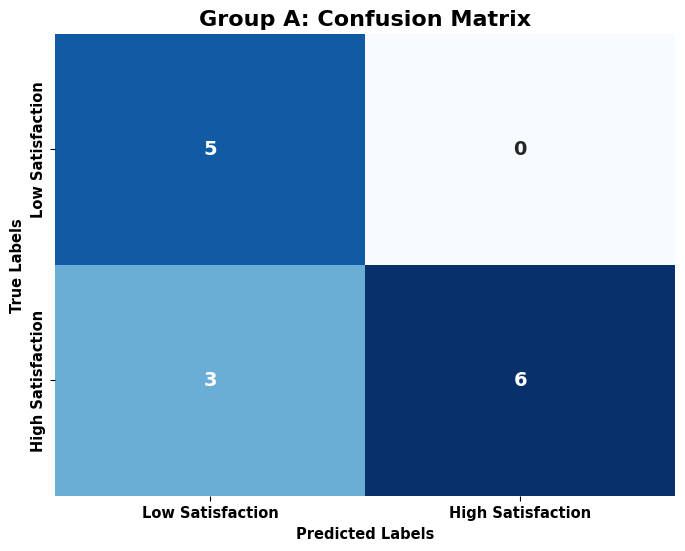

In [ ]:
cms_male = confusion_matrix(y_test_male, y_pred_male)

labels = ['Low Satisfaction', 'High Satisfaction']
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cms_male, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels,
            annot_kws={"size": 14, "weight": "bold"})

# Customizing the title and labels
plt.title('Group A: Confusion Matrix', fontsize=16, fontweight='bold', fontname='Arial')
plt.xlabel('Predicted Labels', fontsize=10.5, fontweight='bold', fontname='Arial')
plt.ylabel('True Labels', fontsize=10.5, fontweight='bold', fontname='Arial')

# Setting the font for x and y tick labels
plt.xticks(fontsize=10.5, fontweight='bold', fontname='Arial')
plt.yticks(fontsize=10.5, fontweight='bold', fontname='Arial')

# Show the plot
plt.show()

Group B - Female

In [ ]:
rf_female = RandomForestClassifier( random_state=42)
rf_female.fit(X_train_smote_female, y_train_smote_female)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set using random forest
y_pred_female = rf_female.predict(X_test_female)

# Generate the classification report
classification_rep = classification_report(y_test_smote_female, y_pred_female, target_names=['Low Satisfaction', 'High Satisfaction'])
print("Classification Report:\n", classification_rep)

Classification Report:
                    precision    recall  f1-score   support

 Low Satisfaction       1.00      0.88      0.93         8
High Satisfaction       0.80      1.00      0.89         4

         accuracy                           0.92        12
        macro avg       0.90      0.94      0.91        12
     weighted avg       0.93      0.92      0.92        12



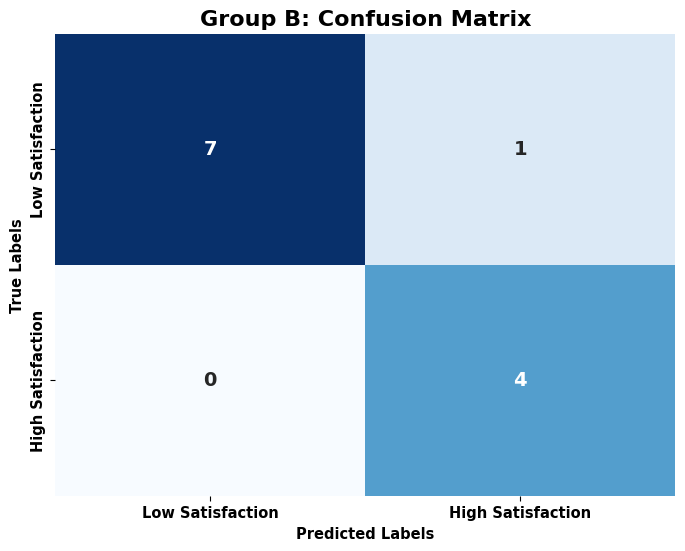

In [ ]:
cms_female = confusion_matrix(y_test_female, y_pred_female)

labels = ['Low Satisfaction', 'High Satisfaction']
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cms_female, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels,
            annot_kws={"size": 14, "weight": "bold"})

# Customizing the title and labels
plt.title('Group B: Confusion Matrix', fontsize=16, fontweight='bold', fontname='Arial')
plt.xlabel('Predicted Labels', fontsize=10.5, fontweight='bold', fontname='Arial')
plt.ylabel('True Labels', fontsize=10.5, fontweight='bold', fontname='Arial')

# Setting the font for x and y tick labels
plt.xticks(fontsize=10.5, fontweight='bold', fontname='Arial')
plt.yticks(fontsize=10.5, fontweight='bold', fontname='Arial')

# Show the plot
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestClassifier(random_state=42), X_train_smote_male, y_train_smote_male, cv=10)
print("Cross-Validation Scores: ", scores)
print("Mean Cross-Validation Score: ", scores.mean())


Cross-Validation Scores:  [0.66666667 0.5        0.6        1.         0.8        0.6
 1.         1.         1.         1.        ]
Mean Cross-Validation Score:  0.8166666666666667


In [ ]:
scores_female = cross_val_score(RandomForestClassifier(random_state=42), X_train_smote_female, y_train_smote_female, cv=10)
print("Cross-Validation Scores Group B: ", scores_female)
print("Mean Cross-Validation Score Grouup B: ", scores_female.mean())

Cross-Validation Scores Group B:  [0.8  1.   0.8  1.   1.   1.   1.   0.6  0.75 1.  ]
Mean Cross-Validation Score Grouup B:  0.8949999999999999


In [ ]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Define the base models (level-0)
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42))
]

In [ ]:
# Define the meta-model (level-1)
meta_model = LogisticRegression()

In [ ]:
# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

In [ ]:
# Train the stacking classifier
stacking_clf.fit(X_train_male, y_train_male)

[LightGBM] [Info] Number of positive: 26, number of negative: 26
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50
[LightGBM] [Info] Number of data points in the train set: 52, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importa...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('lgbm', LGBMClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [ ]:
# Correcting the predict call to use X_test instead of y_test
y_pred = stacking_clf.predict(X_test_male)

# Evaluate the model
accuracy = accuracy_score(y_test_male, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print a classification report
print("Classification Report:")
print(classification_report(y_test_male, y_pred))

Accuracy: 85.71%
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.78      0.88         9

    accuracy                           0.86        14
   macro avg       0.86      0.89      0.85        14
weighted avg       0.90      0.86      0.86        14



In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance